In [1]:
import plot_utils
import cptac
import warnings
import numpy as np
warnings.filterwarnings('ignore')

/Users/Lindsey/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Step 1 Create Data frame with Mutation types


For each cancer type we need to create a df that has the mutation type for each sample.

Load all available types of cancer data

In [2]:
en = cptac.Endometrial()
hn = cptac.Hnscc()
l = cptac.Luad()
o = cptac.Ovarian()
c = cptac.Ccrcc()
col = cptac.Colon()
g = cptac.Gbm()
b = cptac.Brca()
ls = cptac.Lscc()

In [3]:
#cptac version
cptac.version()

'0.8.5'

Second, call get_geneotype_all_vars for PIK3CA for each cancer type. This returns a df with mutation, location, and mutation_status. For individuals with multiple mutations, we report a single mutation type based on the following priority: deletion, truncation, missense, amplification, inframe, silent, and wildtype.

In [4]:
gene = "PIK3CA"

In [5]:
endo = en.get_genotype_all_vars(gene)
gbm = g.get_genotype_all_vars(gene)
hnscc = hn.get_genotype_all_vars(gene)
ovar = o.get_genotype_all_vars(gene)
cc = c.get_genotype_all_vars(gene)
colon = col.get_genotype_all_vars(gene)
ld = l.get_genotype_all_vars(gene)
brca = b.get_genotype_all_vars(gene)
lscc = ls.get_genotype_all_vars(gene)


# Step 2: Match Mutations Labels

Change labels to match final figure

In [6]:
# Simplify mutation names
dfs = [endo, gbm, hnscc, ovar, cc, colon, ld, brca, lscc, cc]
for df in dfs:
    df['Mutation'].where(df['Mutation'] != 'Missense_Mutation', 'Missense', inplace = True) # replaces when false
    df['Mutation'].where(df['Mutation'] != 'Wildtype_Tumor', 'Wildtype', inplace = True)
    df['Mutation'].where(df['Mutation'] != 'In_Frame_Del', 'Indel', inplace = True)
    df['Mutation'].where(df['Mutation'] != 'Nonsense_Mutation', 'Truncation', inplace = True)
    df["Mutation"] = df['Mutation'].replace(['Frame_Shift_Del'], 'Truncation')
    df["Mutation"] = df['Mutation'].replace(['Frame_Shift_Ins'], 'Truncation')
# change colon labels to match other cancers. Nonsynonymous in this case is missense and nonframeshift insertion is Indel.
colon["Mutation"] = colon['Mutation'].replace(['nonsynonymous SNV'], 'Missense')
colon["Mutation"] = colon['Mutation'].replace(['frameshift insertion'], 'Truncation')
colon["Mutation"] = colon['Mutation'].replace(['nonframeshift substitution'], 'Indel')

# change missense to hotspot if hotspot
for df in dfs:
    df.loc[df.Location.str.contains('E542K')] = "Hotspot"
    df.loc[df.Location.str.contains('E545K')] = "Hotspot"
    df.loc[df.Location.str.contains('H1047R')] = "Hotspot"


In [7]:

#Drop Silent mutation type
indexNames = brca[ brca['Mutation'] == "Silent" ].index
brca.drop(indexNames , inplace=True)

# Step 3 Create Figure

Put dfs into a list. Create list of names for figure legend. 
Call plot_mutations function.

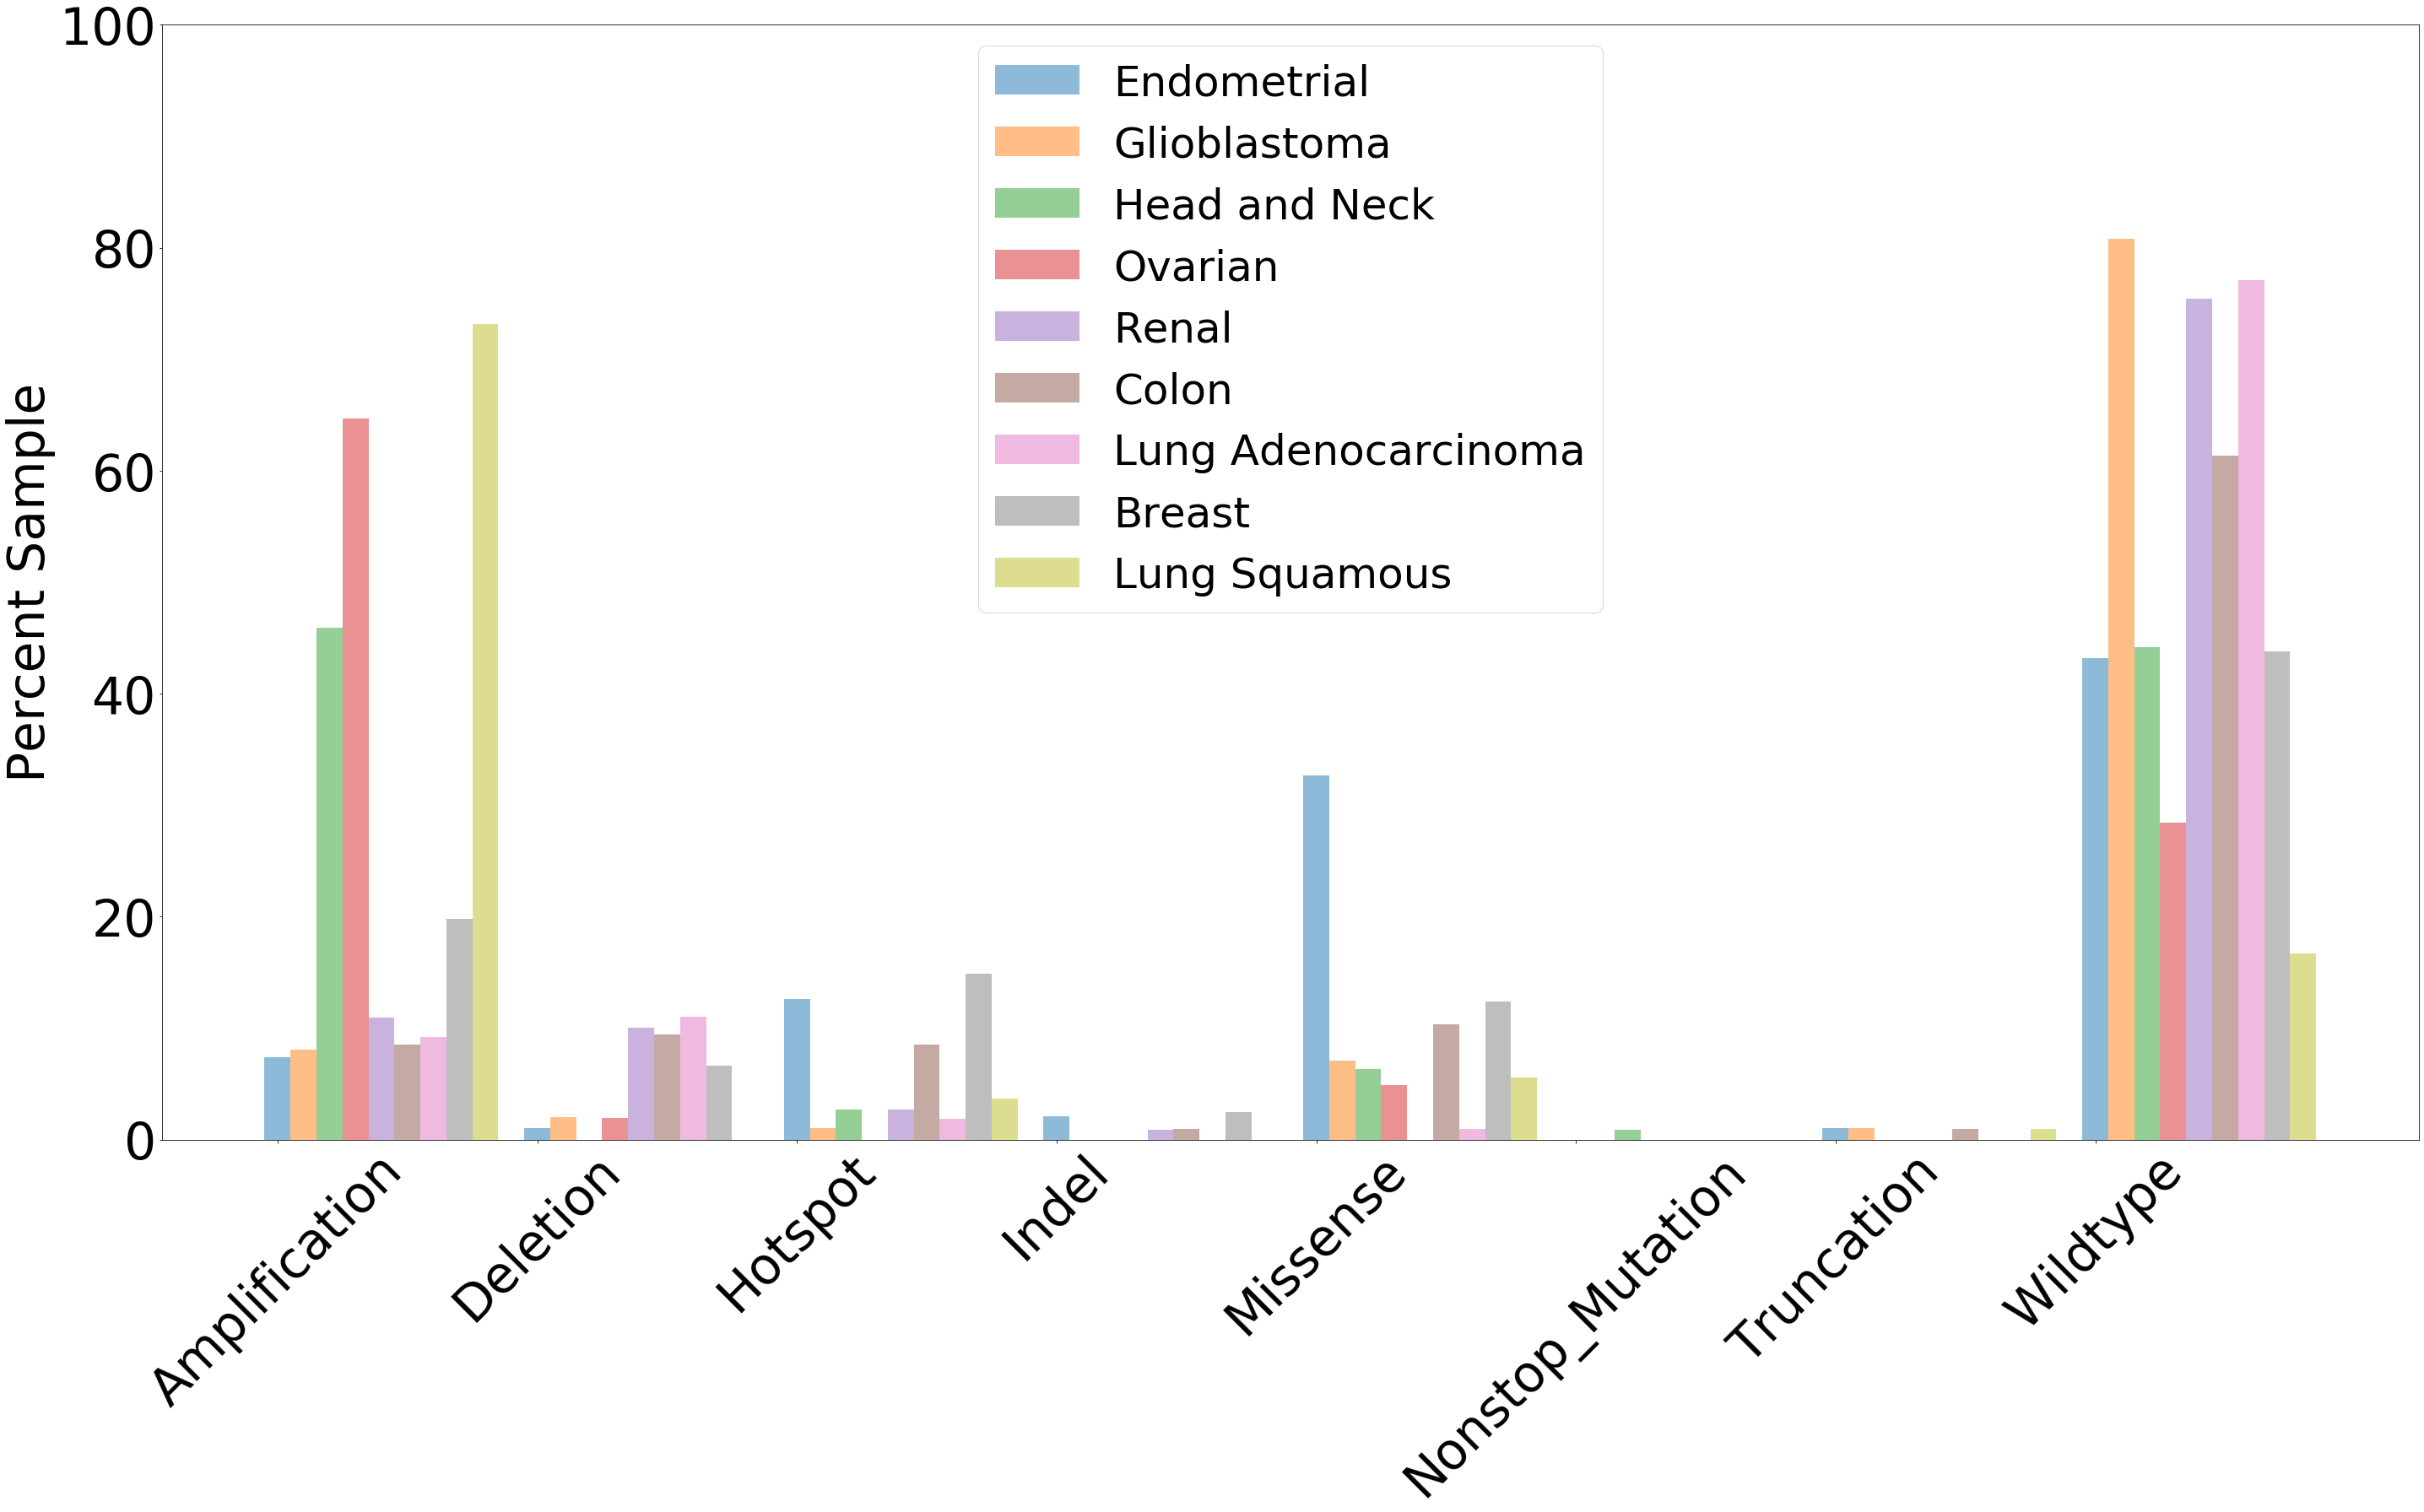

In [8]:
dfs = [endo, gbm, hnscc, ovar, cc, colon, ld, brca, lscc]
names = ['Endometrial', 'Glioblastoma', 'Head and Neck', 'Ovarian', 'Renal', 'Colon', 'Lung Adenocarcinoma', 'Breast', 'Lung Squamous']
plot_utils.figure1_plot_mutations(dfs, names, save_to_path = "PIK3CA_histogram.png")


# Calculate Percent of samples with Hotspot mutations

In [9]:
#Calculate exact percent
#Ovarian does not have hotspot mutations
dfs = [endo, gbm, hnscc, cc, colon, ld, brca, lscc]

names = ['Endometrial', 'Glioblastoma', 'Head and Neck', 'Renal', 'Colon', 'Lung Adenocarcinoma', 'Breast', 'Lung Squamous']
i = 0
for cancer in dfs:

    vc = cancer.Mutation.value_counts()
    total = len(cancer)
    hotspot = vc.Hotspot
    print(names[i])
    print('total_samples:',total,'\n')
    print(hotspot,'/',total,'=', hotspot/total,'\n')
    i += 1
   

Endometrial
total_samples: 95 

12 / 95 = 0.12631578947368421 

Glioblastoma
total_samples: 99 

1 / 99 = 0.010101010101010102 

Head and Neck
total_samples: 111 

3 / 111 = 0.02702702702702703 

Renal
total_samples: 110 

3 / 110 = 0.02727272727272727 

Colon
total_samples: 106 

9 / 106 = 0.08490566037735849 

Lung Adenocarcinoma
total_samples: 109 

2 / 109 = 0.01834862385321101 

Breast
total_samples: 121 

18 / 121 = 0.1487603305785124 

Lung Squamous
total_samples: 108 

4 / 108 = 0.037037037037037035 

